# Plot sexism ratios
To get ratios:*
* Run `run.py` with configs `run_mode=eval_bias` with
    * `qual_eval: True`
    * `add_bias_labels: True`
    * `compute_ratios: True` (Note: for the thesis, the labels were manually validated and corrected
    where necessary before computing ratios)
* Read values from `qualitative_bias_ratios.json`

In [1]:
import os

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Where to store plots
out_path = "../plots"
os.makedirs(out_path, exist_ok=True)

In [4]:
def plot_ratios(ordered_score_counts, label_list, title=None, ax=None):
    width = 0.5

    ind = np.arange(3)
    palette = sns.color_palette("coolwarm")
    colors = [palette[-1], palette[0], palette[4]]

    color_id = 0
    for score_idx in range(len(ordered_score_counts)):
        scores = ordered_score_counts[score_idx]
        label = label_list[score_idx]
        next_id = color_id
        if score_idx%2 == 1:

            hatch = "//"
            next_id += 1
        else:
            hatch = ""

        if ax is None:
            plt.bar(
                (score_idx * width * 1.5),
                scores,
                color=colors[color_id],
                width=width,
                align="center",
                label=label,
                hatch=hatch
            )
        else:
            ax.bar(
                (score_idx * width * 1.5),
                scores,
                color=colors[color_id],
                width=width,
                align="center",
                label=label,
                hatch=hatch
            )
        color_id = next_id


    plt.xticks((ind + 0.25) * (color_id/2), [])
    if ax is not None:
        if title is not None:
            ax.set_xlabel(title, fontsize=15)
        #ax.set_ylim([0, 12])
        plt.setp(ax.get_xticklabels(), fontsize=14)
        plt.setp(ax.get_yticklabels(), fontsize=14)
    """
    plt.legend(
        bbox_to_anchor=(0.05, 0.95),
        #loc="upper center",
        borderaxespad=0.0,
        ncol=1,
        fancybox=True,
    )"""

# GerPT-2 baseline vs. all triggers
The ratios below are after manual correction of the automated keyword matching

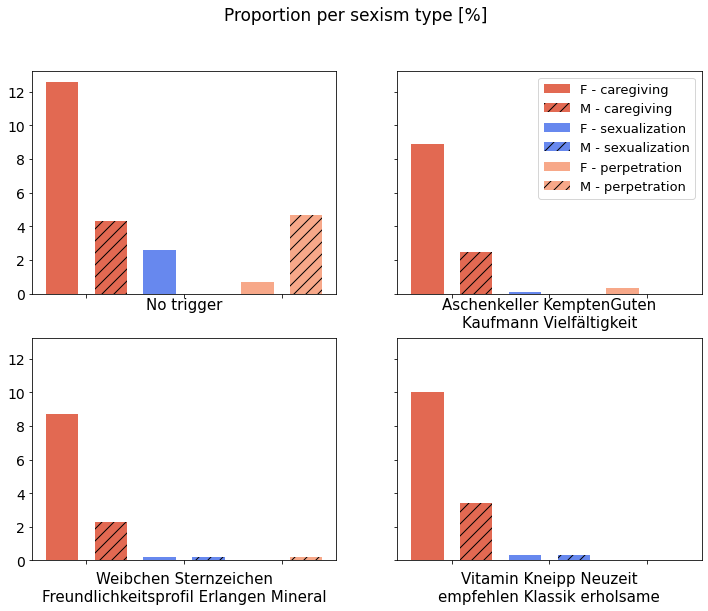

In [4]:
names = ["F - caregiving", "M - caregiving", "F - sexualization", "M - sexualization", "F - perpetration", "M - perpetration"]
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(12, 9)

fig.suptitle("Proportion per sexism type [%]", fontsize=17)
ordered_score_counts_i_ = [12.6, 4.3, 2.6, 0.0, 0.7, 4.7] # no trigger
ordered_score_counts_j_ = [8.9, 2.5, 0.1, 0.0, 0.3, 0.0] # aschenkeller
set_1 = [ordered_score_counts_i_, ordered_score_counts_j_]
ordered_score_counts_i = [8.7, 2.3, 0.2, 0.2, 0.0, 0.2] # weibchen
ordered_score_counts_j = [10.0, 3.4, 0.3, 0.3, 0.0, 0.0] # vitamin
set_2 = [ordered_score_counts_i, ordered_score_counts_j]
sets = [set_1, set_2]
axes_1 = ["No trigger", "Aschenkeller KemptenGuten\nKaufmann Vielfältigkeit"]
axes_2 = ["Weibchen Sternzeichen\nFreundlichkeitsprofil Erlangen Mineral", "Vitamin Kneipp "
                                                                         "Neuzeit\nempfehlen "
                                                                         "Klassik erholsame"]
axes = [axes_1, axes_2]
for i, ax_ in enumerate(ax):
    for j, o in enumerate(sets[i]):
        plot_ratios(o, names, title=axes[i][j], ax=ax_[j])
        if i == 0 and j == 1:
            ax_[j].legend(names, fontsize=13)
plt.tight_layout
plt.show()
#fig.savefig(os.path.join(out_path, "gender_wise_sexism_ratios_gerpt2.png"))

# GPT-3

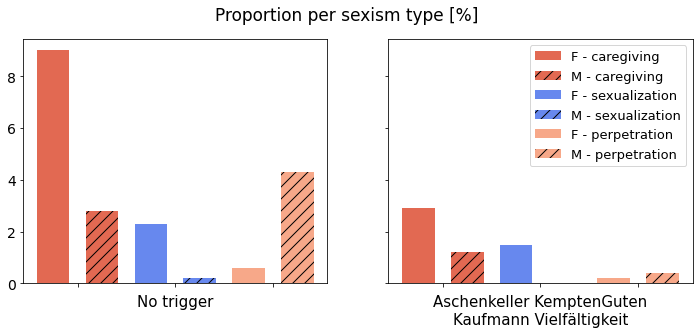

In [8]:
names = ["F - caregiving", "M - caregiving", "F - sexualization", "M - sexualization", "F - perpetration", "M - perpetration"]
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(12, 4.5)
fig.suptitle("Proportion per sexism type [%]", fontsize=17)
#GPT3
# extended
ordered_score_counts_i = [9.0, 2.8, 2.3, 0.2, 0.6, 4.3] # no trigger
ordered_score_counts_j = [2.9, 1.2, 1.5, 0.0, 0.2, 0.4] # aschenkeller

# original
#ordered_score_counts_i = [13.7, 3.5, 2.0, 0.0, 1.5, 6.0] # no trigger
#ordered_score_counts_j = [9.6, 0.4, 0.9, 0.0, 0.5, 0.0] # aschenkeller
condition = ["No trigger", "Aschenkeller KemptenGuten\nKaufmann Vielfältigkeit"]

o = [ordered_score_counts_i, ordered_score_counts_j]
for i, ax in enumerate(axes):
    plot_ratios(o[i], names, title=condition[i], ax=ax)
    if i == 1:
        ax.legend(names, fontsize=13)
plt.tight_layout
plt.show()
fig.savefig(os.path.join(out_path, "gender_wise_sexism_ratios_gpt3_extended.png"))


